In [133]:
# importing different modules to the notebook

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic=pd.read_csv("titanic-data.csv.txt")

# Data Preprocessing
# filling the missing data in Age column with their median age 
titanic.Age.fillna(titanic.Age.median(),inplace=True)
#We are removing the "Cabin" column as it contains most of entries as NaN
titanic.drop("Cabin", axis=1,inplace=True)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Since we are done with data preprocessing , lets analyze our Dataset
   by finding the nuber of people who survived  and those who did not, and we can see that in our given dataset ,549 people did 
   not survive  and only 342 survived.

In [28]:
# finding the number of people survived and those who do not in given dataset
print("Number of people did not Survived:")
print(titanic[titanic.Survived==0].Survived.value_counts())
print("Number of people who Survived:")
print(titanic[titanic.Survived==1].Survived.value_counts())

Number of people did not Survived:
0    549
Name: Survived, dtype: int64
Number of people who Survived:
1    342
Name: Survived, dtype: int64


# Lets find out survival of the people with respect to their "Gender" 
  We are making assumption that people below age 10 would be considered as children 

In [132]:
# finding the number of people who survived but , were female, chidren below 10, male
print("Number of womens survived above age 10:")
print(titanic[(((titanic.Age>10) & (titanic.Sex=="female")) & (titanic.Survived==1))].Survived.value_counts())
print("Number of men survived above age 10 :")
print(titanic[(((titanic.Age>10) & (titanic.Sex=="male")) & (titanic.Survived==1))].Survived.value_counts())
print("Number of chidren survived below or at age 10 :")
print(titanic[((titanic.Age<=10)  & (titanic.Survived==1))].Survived.value_counts())


Number of womens survived above age 10:
1    214
Name: Survived, dtype: int64
Number of men survived above age 10 :
1    90
Name: Survived, dtype: int64
Number of chidren survived below or at age 10 :
1    38
Name: Survived, dtype: int64


# lets find out percentage of survival for each men,women ,children
  we can easily see that survival rate of women are much high as compared to the men or children and it can be inferred 
  that rescue policy have "women and children first" Approach.Survival percentage : women = 75.61 % , children= 59.37 %, 
  men= 16.54 %

In [39]:
# lets find out the percentage of men,women, children, survived 
no_of_men=len(titanic[((titanic.Age>10)&(titanic.Sex=="male"))].Survived)
no_of_women=len(titanic[((titanic.Age>10)&(titanic.Sex=="female"))].Survived)
no_of_children=len(titanic[(titanic.Age<=10)].Survived)
print("Percentage of men Survived:")
print(((titanic[(((titanic.Age>10) & (titanic.Sex=="male")) & (titanic.Survived==1))].Survived.value_counts())/no_of_men) *100)
print("Percentage of women Survived:")
print(((titanic[(((titanic.Age>10) & (titanic.Sex=="female")) & (titanic.Survived==1))].Survived.value_counts())/no_of_women)*100)
print("Percentage of children Survived:")
print(((titanic[((titanic.Age<=10)  & (titanic.Survived==1))].Survived.value_counts())/no_of_children)*100)

Percentage of men Survived:
1    16.544118
Name: Survived, dtype: float64
Percentage of women Survived:
1    75.618375
Name: Survived, dtype: float64
Percentage of children Survived:
1    59.375
Name: Survived, dtype: float64


"""In the above , we can see that Survivial rate of WOMEN was the highest ,followed by CHILDREN"""

# lets do Visualization 

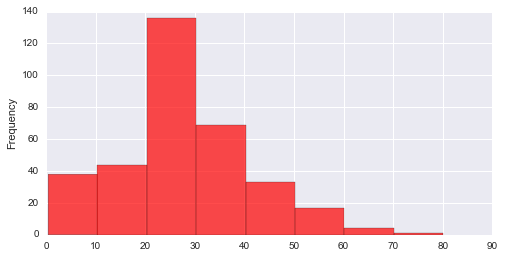

In [105]:
#plotting the histogram of the age of the people who survived

titanic[titanic.Survived==1].Age.plot.hist(bins=8,alpha=0.7,color="r",figsize=(8,4))

We  can see that maximum no of people who survived belong to the age group of 20-30, irrespective of their class, and gender. This distribution follows a normal Curve.

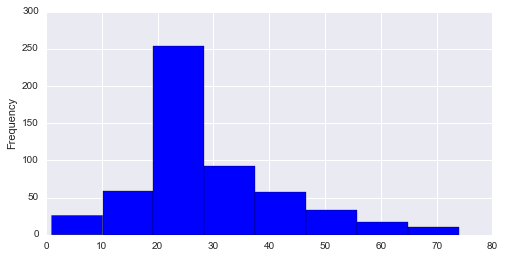

In [82]:
#plotting the histogram of the age of the people who did not survive

titanic[titanic.Survived==0].Age.plot(bins=8,color="b",kind="hist",figsize=(8,4))

In this case also , maximum number of people who didnt survive falls in range 20-30

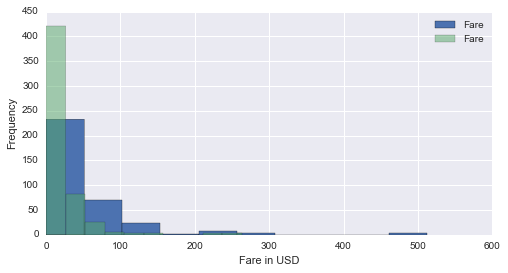

In [131]:
# plotting survival of passenger vs Fare 

plt.figure()
titanic[titanic.Survived==1].Fare.plot(kind="hist",figsize=(8,4))
titanic[titanic.Survived==0].Fare.plot.hist(alpha=0.5)
plt.xlabel("Fare in USD")
plt.legend()

in the above plot, we can see that number of people who did not survive with fare less than 25 USD is comparatively higher as compared to those who did survive with less than 25 USD fare. We can say to some extent ,that rescue mission had some baise towards lower class people .

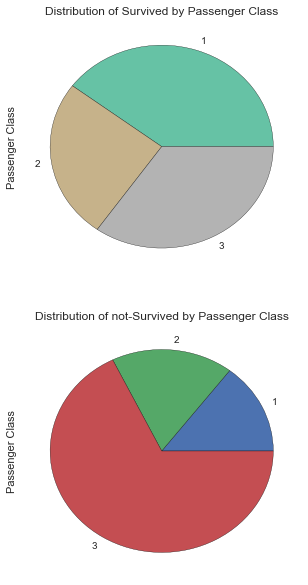

In [129]:
#Plotting pie charts depicting different passenger classes with survival and non-survival rate
# We can see that how Passenger class affected the survival , as People from higer class had better chances for survival
# Proportion of people who could not survived was higher in lowest class, namely 3

f, ax = plt.subplots(2,1, figsize=(5,10))
titanic[titanic.Survived==1].groupby('Pclass').size().plot.pie(ax=ax[0],cmap='Set2')
ax[0].set_title("Distribution of Survived by Passenger Class")
ax[0].set_ylabel("Passenger Class")
titanic[titanic.Survived==0].groupby("Pclass").size().plot.pie(ax=ax[1])
ax[1].set_ylabel("Passenger Class")
ax[1].set_title("Distribution of not-Survived by Passenger Class")

We can see that how Passenger class affected the survival , as People from higer class had better chances for survival
Proportion of people who could not survived was higher in lowest class, namely "3".


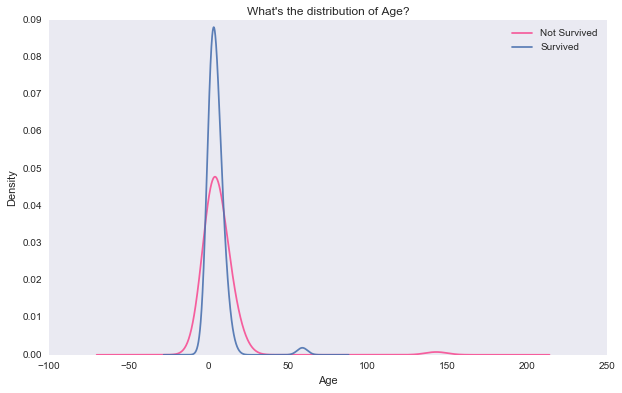

In [126]:
# plotting density curve for age against survived and non-survived
# We can see that the desnsity of person who survived is higher between age group 0- 15 , as compared to non-survived, roughly.

fig = plt.figure(figsize=(10, 6))
titanic[titanic.Survived==0].Age.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=0.7)
titanic[titanic.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=0.9)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

Density curve shows that the density of children age<10 have better chance for Survival.

# Lets perform Some Statistical Test

In [152]:
# importing scipy
from scipy.stats import ttest_ind
survived_men=titanic[((titanic.Survived==1) &(titanic.Sex=="male"))].Age
survived_women =titanic[((titanic.Survived==1) &(titanic.Sex=="female"))].Age
print("")
print(ttest_ind(survived_men, survived_women,equal_var=False))


Ttest_indResult(statistic=-0.7892830163833362, pvalue=0.43095956954392822)


Here we are conducting t-test on two independent samples from the same population ,where one sample consist of age of women who 
survived while other sample consist of age distribution of men who survived.

Null hypothesis : average age of women (survived) = average age of men (survived)
Alternative hypothesis : average age of women (survived) != average age of men (Survvived)

test result : Since our p- value is much greater than the alpha=0.05 , we will retain the Null.

Conclusion : Average age of women and men those survived are not significantly different.


## Lets find out whether average fare differ significantly across those who survived and those      who did not, by applying  t- test

In [151]:
survived_fare=titanic[titanic.Survived==1].Fare
notsurvived_fare=titanic[titanic.Survived==0].Fare
print("")
print(ttest_ind(survived_fare,notsurvived_fare,equal_var=False))



Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)


Again our p- value is greater than alpha=0.05 , we would can assume that there is no significant difference across average fare 
between those who survived and those who do not.

"We are assuming that population variance is not equal, by setting the parameter ,equal_var=False "